In [1]:
import numpy as np
import pandas as pd
import os.path
import shutil
import datetime
from dateutil.rrule import rrule, YEARLY, MONTHLY
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
generated_path = 'E:\\dtuklaptop\\e\\Users\\Mat\\python\\data\\property\\checked\\'

In [3]:
def load_data(start, end):
    csvext='.csv'
    xlsext='.xlsx'
    start_date=datetime.datetime.strptime(start, '%Y-%m-%d')
    end_date=datetime.datetime.strptime(end, '%Y-%m-%d')
    dates = [dt for dt in rrule(MONTHLY, dtstart=start_date, until=end_date)]

    dfAll=pd.DataFrame()
    dfAll=pd.DataFrame(columns=['Account','Amount','Subcategory','Memo','Property','Description','Cat','Subcat'])

    for date in dates:
        dateStr= date.strftime("%b").upper() + date.strftime("%Y")
        input_file=generated_path + dateStr + '_codedAndCategorised'
        csvExist=os.path.isfile(input_file + csvext)
        xlsExist=os.path.isfile(input_file + xlsext)
        if((not csvExist)&(not xlsExist)):
            print('Warning missing file: ' + input_file)
            continue
        # Load excel file if both types exist
        if xlsExist:
            print('Reading file: ' + input_file + xlsext)
            dfTemp=pd.read_excel(input_file + xlsext, index_col=0, parse_dates=True, dayfirst=True)
        else:
            print('Reading file: ' + input_file + csvext)
            dfTemp=pd.read_csv(input_file + csvext, index_col=0, parse_dates=True, dayfirst=True)
        dfAll=pd.concat([dfAll,dfTemp])
        dfAll=dfAll[['Account','Amount','Subcategory','Memo','Property','Description','Cat','Subcat']]

    return dfAll

- Use this notebook to summarise annual data to see what to expect in the accounts
- Also, chart at bottom shows how monthly balance of Starting fluctuates

## Load Data

In [4]:
start='2023-04-06'
end='2024-04-05'
dfAll=load_data(start,end)
dfAll

Reading file: E:\dtuklaptop\e\Users\Mat\python\data\property\checked\APR2023_codedAndCategorised.xlsx
Reading file: E:\dtuklaptop\e\Users\Mat\python\data\property\checked\MAY2023_codedAndCategorised.xlsx
Reading file: E:\dtuklaptop\e\Users\Mat\python\data\property\checked\JUN2023_codedAndCategorised.xlsx
Reading file: E:\dtuklaptop\e\Users\Mat\python\data\property\checked\JUL2023_codedAndCategorised.xlsx


C:\Users\MSTDTP21\.conda\envs\mtpython36\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



Reading file: E:\dtuklaptop\e\Users\Mat\python\data\property\checked\AUG2023_codedAndCategorised.xlsx
Reading file: E:\dtuklaptop\e\Users\Mat\python\data\property\checked\SEP2023_codedAndCategorised.xlsx
Reading file: E:\dtuklaptop\e\Users\Mat\python\data\property\checked\OCT2023_codedAndCategorised.xlsx
Reading file: E:\dtuklaptop\e\Users\Mat\python\data\property\checked\NOV2023_codedAndCategorised.xlsx
Reading file: E:\dtuklaptop\e\Users\Mat\python\data\property\checked\DEC2023_codedAndCategorised.xlsx
Warning missing file: E:\dtuklaptop\e\Users\Mat\python\data\property\checked\JAN2024_codedAndCategorised
Warning missing file: E:\dtuklaptop\e\Users\Mat\python\data\property\checked\FEB2024_codedAndCategorised
Warning missing file: E:\dtuklaptop\e\Users\Mat\python\data\property\checked\MAR2024_codedAndCategorised


,Account,Amount,Subcategory,Memo,Property,Description,Cat,Subcat
2023-04-01,60-83-71 00558156,-465.00,REPAIRS_AND_MAINTENANCE,Alhambra Road M Tucker SC,NaN,NaN,ServiceCharge,NaN
2023-04-01,60-83-71 00558156,-315.00,REPAIRS_AND_MAINTENANCE,ALHHAMBRA ROAD M Tucker SC,NaN,NaN,ServiceCharge,NaN
2023-04-01,60-83-71 00558156,950.00,REVENUE,HICKS S 23BHAMPTERR,23BHAM,NaN,OurRent,NaN
2023-04-01,60-83-71 00558156,600.00,REVENUE,NATSO P BILL,F4163FRA,NaN,OurRent,NaN
2023-04-01,60-83-71 00558156,-320.00,REPAIRS_AND_MAINTENANCE,Alhambra Road M Tucker SC,NaN,NaN,ServiceCharge,NaN
...,...,...,...,...,...,...,...,...
2024-01-02,20-74-09 40406538,-8.40,Contactless Card Purchase,CO OPERATIVE FOOD ON 30 DEC CLP,NaN,NaN,PersonalExpense,COOP
2024-01-02,20-74-09 40406538,-2.40,Contactless Card Purchase,CRAVIN FLITWICK ON 30 DEC CLP,NaN,NaN,PersonalExpense,Other
2024-01-02,20-74-09 40406538,-8.70,Contactless Card Purchase,TL FLITWICK ON 30 DEC CLP,NaN,NaN,PersonalExpense,Other
2024-01-02,20-53-97 30728691,2610.39,Counter Credit,Rsa Capital Limite Mortgages BGC,NaN,NaN,OtherIncome,NaN


In [5]:
# List all categories
dfAll.Cat.unique()

array(['ServiceCharge', 'OurRent', 'PersonalExpense', 'RegularPayment',
       'HMRCDD', 'Mortgage', 'Drawings', 'MortgageRefund',
       'PropertyExpense', 'Hilltop', 'OtherIncome', 'OtherExpense',
       'BealsRent', 'Deposit', 'Car', 'LordswoodEstatesLtd', 'SchoolFee',
       'Funds3072', 'Funds6045', 'Christmas', 'Funds4040'], dtype=object)

### Accounts


In [6]:
dfRSA=dfAll[dfAll['Account'] == '60-83-71 00558156'].copy()
dfMortgages=dfAll[(dfAll['Cat'] == 'Mortgage')].copy()
df = pd.concat([dfRSA, dfMortgages])


cat_mapping = {
    'OurRent': 'Rent',
    'BealsRent': 'Rent',
    'Deposit': 'Rent',
    'PersonalExpense': 'Drawings',
    'ServiceCharge': 'PropertyExpense',
    'ServiceChargeRefund': 'PropertyExpense',
    'OtherExpense': 'PropertyExpense'

}

def map_categories(cat):
    if cat in cat_mapping:
        return cat_mapping[cat]
    else:
        return cat

df['AccountCat'] = df['Cat'].map(map_categories)
#df.groupby('AccountCat')['Amount'].sum()

In [7]:
result=df.groupby('AccountCat')['Amount'].sum()
result = result[(result <= -100) | (result >= 100)]
print(result)

AccountCat
Drawings            -2745.38
Mortgage          -212473.38
MortgageRefund    -220099.83
PropertyExpense    -43206.84
RegularPayment       -500.00
Rent               282303.42
Name: Amount, dtype: float64


## Normalized monthly balances

In [8]:
df=dfAll[dfAll['Account'] == '60-83-71 00558156'].copy()
#dfMortgages=dfAll[(dfAll['Cat'] == 'Mortgage')].copy()
#df = pd.concat([dfRSA, dfMortgages])
#df.head()

In [9]:
df['Month'] = df.index.month
df['Year'] = df.index.year

# Grouping by year, month, and day, and then summing up daily transactions
daily_data =df.groupby(['Year', 'Month', df.index.day])['Amount'].sum().reset_index()
#daily_data.head(30)

In [10]:
# Balannces per month
# dfAll.resample('M').sum()

In [11]:
# Normalizing each month's balance starting from the balance at the beginning of the month
for year_month, group in daily_data.groupby(['Year', 'Month']):
    month_start_balance = daily_data.loc[(daily_data['Year'] == year_month[0]) & (daily_data['Month'] == year_month[1])].iloc[0]['Amount'].cumsum()
    month_balance = group['Amount'].cumsum()
    daily_data.loc[group.index, 'Normalized Balance'] = month_balance

daily_data

,Year,Month,level_2,Amount,Normalized Balance
0,2023,4,1,450.00,450.00
1,2023,4,2,925.00,1375.00
2,2023,4,3,-9597.01,-8222.01
3,2023,4,4,-820.00,-9042.01
4,2023,4,5,11291.18,2249.17
...,...,...,...,...,...
236,2023,12,25,-100.00,-8004.71
237,2023,12,27,878.41,-7126.30
238,2023,12,28,1695.06,-5431.24
239,2023,12,29,1543.01,-3888.23


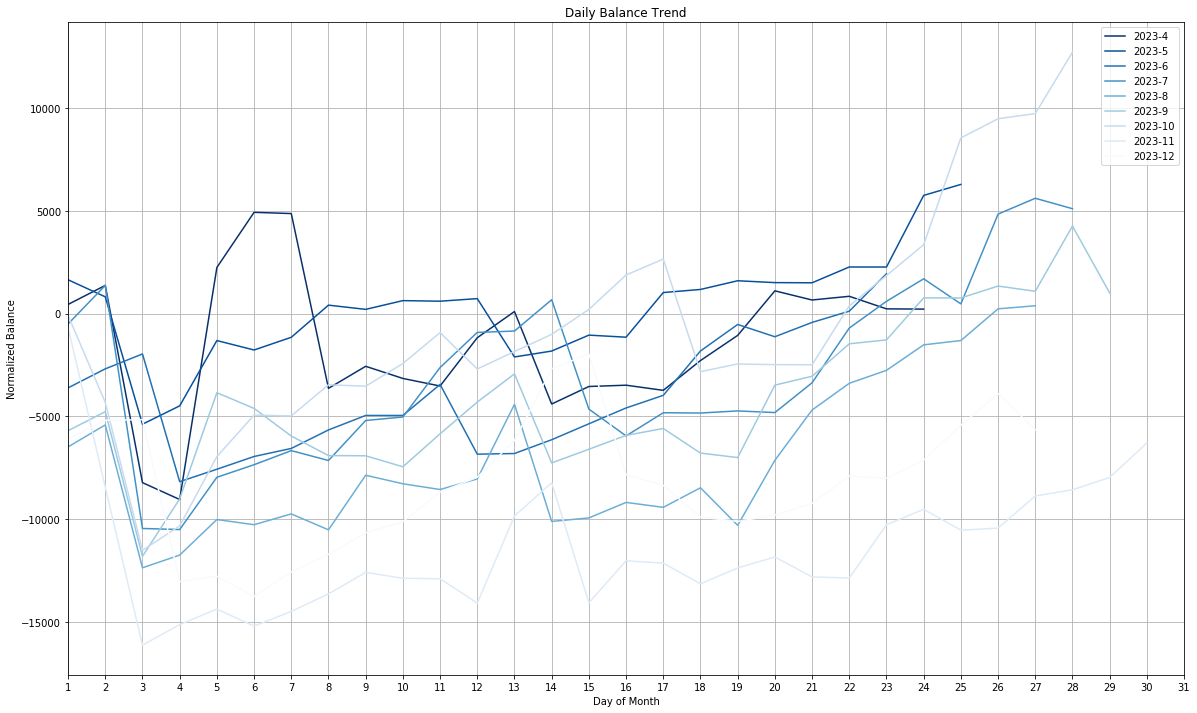

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

# Assuming daily_data is your DataFrame with daily balance data
# Setting the index to include 'Year' and 'Month'
daily_data.set_index(['Year', 'Month', daily_data.index], inplace=True)

# Plotting daily balance for each month
plt.figure(figsize=(20, 12))

# Get the total number of months
num_months = len(daily_data.groupby(['Year', 'Month']))

# Define a colormap
cmap = plt.get_cmap('Blues')

# Iterate over each month and plot its data
for i, (year_month, group) in enumerate(daily_data.groupby(['Year', 'Month'])):
    # Normalize day of month to start from 1
    day_of_month = group.index.get_level_values(2) - group.index.get_level_values(2).min() + 1
    # Calculate color based on position of the month relative to total number of months
    color = cmap((num_months - 1 - i) / (num_months - 1))  # Reverse index to start from lightest blue
    plt.plot(day_of_month, group['Normalized Balance'], label=f'{year_month[0]}-{year_month[1]}', color=color)

plt.xlabel('Day of Month')
plt.ylabel('Normalized Balance')
plt.title('Daily Balance Trend')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 32))  # Set ticks for each day of the month
plt.xlim(1, 31)  # Set x-axis limits from 1 to 31
plt.show()


In [13]:
# Above is monthly balance - lightest colors are newest
# shows balance picks up from 20th onwards